In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5)

In [2]:
#Create a small synthetic dataset
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [3]:
#Encode categorical feature and prepare x, y
df_synthetic['Weather_num'] = df_synthetic['Weather'].map({'Sunny' : 1, 'Rainy' : 0})

x_syn = df_synthetic[['Weather_num', 'Windy']]
y_syn = df_synthetic['Play']
print(x_syn)
print(y_syn)

   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


In [4]:
# Train a simple decision tree
tree_syn = DecisionTreeClassifier(max_depth=3, random_state=42) # depth 3 because we want a small tree
tree_syn.fit(x_syn, y_syn)
tree_syn

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


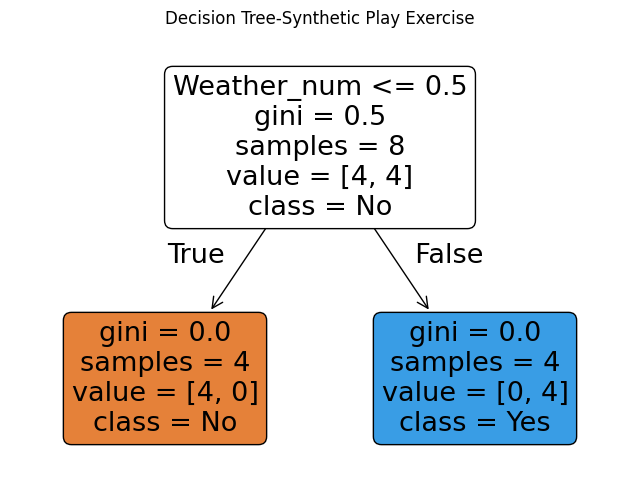

In [5]:
# Visualize the tree
plt.figure(figsize=(8, 6))
plot_tree(
    tree_syn,
    feature_names=['Weather_num', 'Windy'],
    class_names= ['No', 'Yes'],
    filled = True,
    rounded = True
)
plt.title('Decision Tree-Synthetic Play Exercise')
plt.show()

In [6]:
# Quick prediction
# Example: Sunny (1), Rainy (0), not windy (0), windy(1)
ex_1 = pd.DataFrame([[1,0]], columns = ['Weather_num', 'Windy'])
print(ex_1)
pred_1 = tree_syn.predict(ex_1)[0]
print('Sunny, not Windy -> Play prediction: ', pred_1)

# Example: Rainy (0), Windy(1)
ex_2 = pd.DataFrame([[0,1]], columns = ['Weather_num', 'Windy'])
pred_2 = tree_syn.predict(ex_2)[0]
print('Rainy, Windy -> Play prediction: ', pred_2)

   Weather_num  Windy
0            1      0
Sunny, not Windy -> Play prediction:  1
Rainy, Windy -> Play prediction:  0


In [7]:
# Overfitting and Pruning
# Create a slightly larger synthetic dataset
from sklearn.datasets import make_classification

X_big, y_big = make_classification(
    n_samples=400,#Total data points
    n_features=5,#Total feature number
    n_informative=3,#Total relevant features, 3 features who will help target feature and rest 2 is noisy they don't help.
    n_redundant=0,#No strong correlation among the features, or no same feature
    n_classes=2,#Target variable/feature class number
    random_state=42,#Every time we will get the similar random dataset
)

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(
    X_big, y_big, test_size=0.3, random_state=42
)

X_train_big.shape, X_test_big.shape

((280, 5), (120, 5))

In [8]:
# Train deep tree
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big, y_train_big)

# Train pruned tree
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train_big, y_train_big)

# Test the train datas
y_train_pred_deep = deep_tree.predict(X_train_big)
y_test_pred_deep = deep_tree.predict(X_test_big)

y_train_pred_pruned = pruned_tree.predict(X_train_big)
y_test_pred_pruned = pruned_tree.predict(X_test_big)


print('Deep tree_train accuracy:', round(accuracy_score(y_train_big, y_train_pred_deep), 3))
print('Deep tree_test accuracy :', round(accuracy_score(y_test_big, y_test_pred_deep), 3))
print()
print('Pruned tree_train accuracy:', round(accuracy_score(y_train_big, y_train_pred_pruned), 3))
print('Pruned tree_test accuracy :', round(accuracy_score(y_test_big, y_test_pred_pruned), 3))


Deep tree_train accuracy: 1.0
Deep tree_test accuracy : 0.883

Pruned tree_train accuracy: 0.904
Pruned tree_test accuracy : 0.892


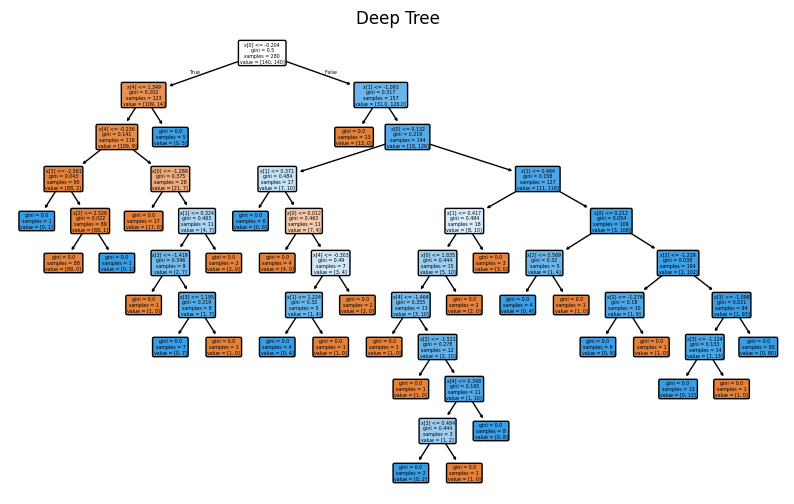

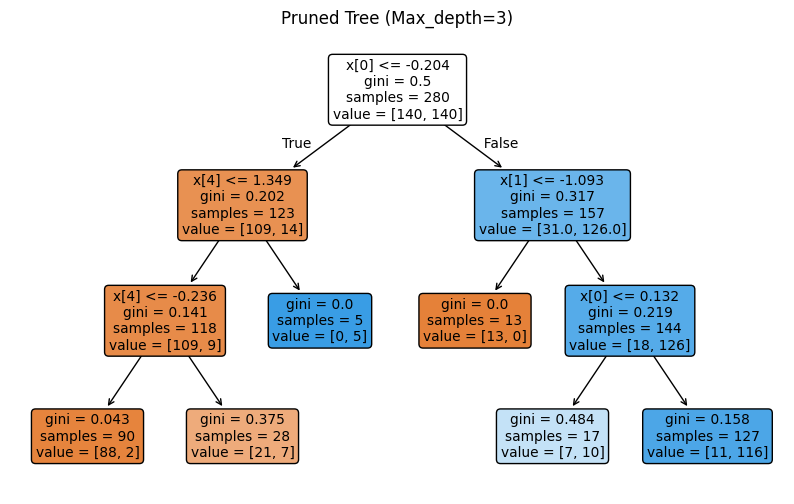

In [9]:
# Plot deep tree (showing only top levels for readability)
plt.figure(figsize=(10,6))
plot_tree(deep_tree, filled=True,rounded=True)
plt.title("Deep Tree")
plt.show()

# Plot pruned tree
plt.figure(figsize=(10,6))
plot_tree(pruned_tree, filled=True,rounded=True)
plt.title("Pruned Tree (Max_depth=3)")
plt.show()

In [11]:
# Evaluating a Decision Tree (Accuracy, Precision, Recall, F1, Confusion Matrix)
np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples) # heart rate

# We create a simple rule-based probability for disease just for realism
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))    # Probability of heart disease

target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head(10)

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
5,50,295,151,1
6,68,277,152,1
7,48,259,114,1
8,52,231,145,0
9,40,203,122,0


In [12]:
# Train-test split and model training
x_heart = df_heart[['age','chol', 'thalach']]
y_heart = df_heart['target']

x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(
    x_heart, y_heart, test_size=0.2, random_state=42
)

tree_heart = DecisionTreeClassifier(max_depth=4, random_state=42)

tree_heart.fit(x_train_h, y_train_h)

tree_heart

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# Confusion Matrix

y_pred_h = tree_heart.predict(x_test_h)

cm = confusion_matrix(y_test_h, y_pred_h)
print(cm)

[[23  3]
 [ 6 28]]


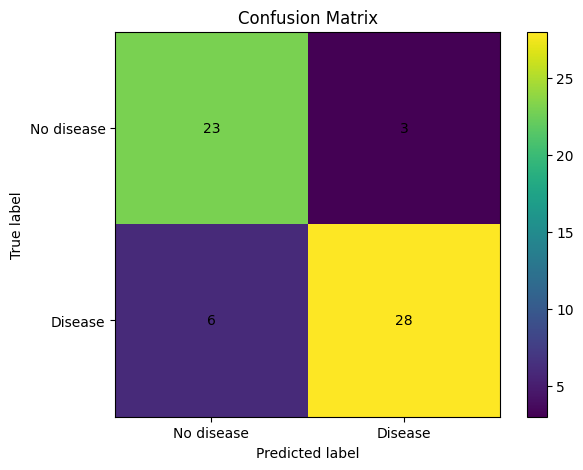

In [15]:
# Plot of confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation = 'nearest')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Show all ticks and label them
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["No disease", 'Disease'])
ax.set_yticklabels(["No disease", 'Disease'])


# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i,j], ha='center', va='center')
        
plt.colorbar(im)
plt.show()

In [ ]:
# ROC Curve and AUC -> is a powerful visualizetion tool which shows the classification performance in all possible threshold(0.1 to 1).
# ROC curve is designed in the aspect of TPR and FPR. Target is to increase TPR
# ROC curves result can be represented by AUC

# Predicted Probabilities
y_proba_h = tree_heart.predict_proba(x_test_h)[:, 1]
y_proba_h[:10]


array([0.875     , 0.        , 0.04761905, 0.        , 0.875     ,
       1.        , 1.        , 1.        , 1.        , 0.        ])

In [19]:
fpr, tpr, thresholds = roc_curve(y_test_h, y_proba_h)
roc_auc = auc(fpr, tpr)
print('AUC: ', round(roc_auc, 3))

AUC:  0.925


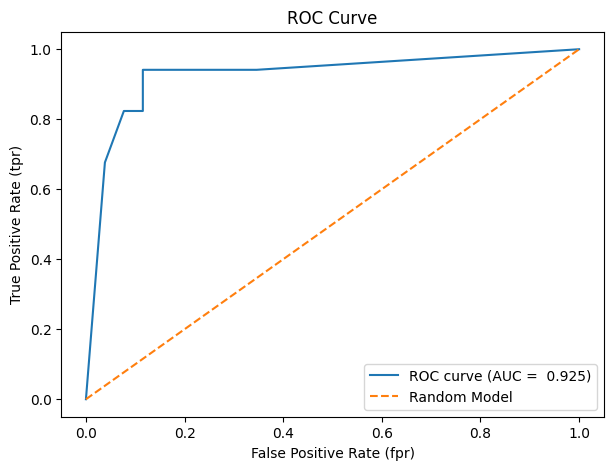

In [20]:
# plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random Model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

Interpretation tips:
- A curve closer to the **top-left corner** is better.
- AUC near 1.0 means strong separation between classes.
- AUC near 0.5 means the model is no better than random.